In [1]:
using Plots, DifferentialEquations, LaTeXStrings, Optim, SpecialFunctions, Random,Distributions, Interpolations, Dierckx, NLopt, ForwardDiff
using Roots,LinearAlgebra
gr(); #Load packages

In [2]:
function Stochastic(LX,LY,t1,A0,PM,PP) #Stochastic model
Q=sum(A0)
T=Int(t1)
AA=zeros(LX,LY)
NumAgent=zeros(LX)
NumAgent0=zeros(LX)
AAtemp=copy(A0)

pos = [(0, 0) for _ in 1:5*Q]
pos0 = [(0, 0) for _ in 1:Q]    
    
for i in 1:LX
     for j in 1:LY
        NumAgent0[i]=NumAgent0[i]+AAtemp[i,j]
    end
end
count = 0    
for i in 1:LX
    for j in 1:LY
        if A0[i,j] > 0
        count +=1
        pos0[count] = (i,j)
        end
    end
end
    
    for kk in 1:T
        count = 0
        Q=sum(AAtemp)
        while count  < Q
            II =rand(1:LX)
            JJ=rand(1:LY)
            if AAtemp[II,JJ] > 0.0 && II>1 && II<LX && JJ > 1 && JJ < LY 
            count=count+1
            R =rand(1)
            S=rand(1)
                if AAtemp[II-1,JJ] == 0.0 && R[1] > 0 && R[1]<=1/4 && S[1] <=PM
                AAtemp[II,JJ]=0.0
                AAtemp[II-1,JJ]=1.0
                elseif AAtemp[II+1,JJ] == 0.0 && R[1] > 1/4 && R[1]<=2/4  && S[1] <=PM
                AAtemp[II,JJ]=0.0
                AAtemp[II+1,JJ]=1.0
                elseif AAtemp[II,JJ-1] == 0.0 && R[1] > 2/4 && R[1]<=3/4  && S[1] <=PM
                AAtemp[II,JJ]=0.0
                AAtemp[II,JJ-1]=1.0
                elseif AAtemp[II,JJ+1] == 0.0 && R[1] > 3/4 && R[1]<=4/4  && S[1] <=PM
                AAtemp[II,JJ]=0.0
                AAtemp[II,JJ+1]=1.0
                end

                elseif AAtemp[II,JJ] > 0.0 && II>1 && II<LX && JJ == 1 
                    count=count+1
                    R =rand(1)
                    S=rand(1)
                        if AAtemp[II-1,JJ] == 0.0 && R[1] > 0 && R[1]<=1/4  && S[1] <=PM
                        AAtemp[II,JJ]=0.0
                        AAtemp[II-1,JJ]=1.0
                        elseif AAtemp[II+1,JJ] == 0.0 && R[1] > 1/4 && R[1]<=2/4 && S[1] <=PM
                        AAtemp[II,JJ]=0.0
                        AAtemp[II+1,JJ]=1.0
                        elseif AAtemp[II,JJ+1] == 0.0 && R[1] > 3/4 && R[1]<=4/4 && S[1] <=PM
                        AAtemp[II,JJ]=0.0
                        AAtemp[II,JJ+1]=1.0
                        end
        

                    elseif AAtemp[II,JJ] > 0.0 && II>1 && II<LX &&  JJ == LY 
                            count=count+1
                            R =rand(1)
                            S=rand(1)
                                if AAtemp[II-1,JJ] == 0.0 && R[1] > 0 && R[1]<=1/4  && S[1] <=PM
                                AAtemp[II,JJ]=0.0
                                AAtemp[II-1,JJ]=1.0
                                elseif AAtemp[II+1,JJ] == 0.0 && R[1] > 1/4 && R[1]<=2/4 && S[1] <=PM
                                AAtemp[II,JJ]=0.0
                                AAtemp[II+1,JJ]=1.0
                                elseif AAtemp[II,JJ-1] == 0.0 && R[1] > 2/4 && R[1]<=3/4 && S[1] <=PM
                                AAtemp[II,JJ]=0.0
                                AAtemp[II,JJ-1]=1.0
                                 end
            end
        end
    
            count = 0
            Q=sum(AAtemp)
            while count  < Q
            II =rand(1:LX)
            JJ=rand(1:LY)
            if AAtemp[II,JJ] > 0.0 && II>1 && II<LX && JJ > 1 && JJ < LY 
            count=count+1
            R =rand(1)
            S=rand(1)
                if AAtemp[II-1,JJ] == 0.0 && R[1] > 0 && R[1]<=1/4 && S[1] <=PP
                AAtemp[II-1,JJ]=1.0
                elseif AAtemp[II+1,JJ] == 0.0 && R[1] > 1/4 && R[1]<=2/4  && S[1] <=PP
                AAtemp[II+1,JJ]=1.0
                elseif AAtemp[II,JJ-1] == 0.0 && R[1] > 2/4 && R[1]<=3/4  && S[1] <=PP
                AAtemp[II,JJ-1]=1.0
                elseif AAtemp[II,JJ+1] == 0.0 && R[1] > 3/4 && R[1]<=4/4  && S[1] <=PP
                AAtemp[II,JJ+1]=1.0
                end

                elseif AAtemp[II,JJ] > 0.0 && II>1 && II<LX && JJ == 1 
                    count=count+1
                    R =rand(1)
                    S=rand(1)
                        if AAtemp[II-1,JJ] == 0.0 && R[1] > 0 && R[1]<=1/4  && S[1] <=PP
                        AAtemp[II-1,JJ]=1.0
                        elseif AAtemp[II+1,JJ] == 0.0 && R[1] > 1/4 && R[1]<=2/4 && S[1] <=PP
                        AAtemp[II+1,JJ]=1.0
                        elseif AAtemp[II,JJ+1] == 0.0 && R[1] > 3/4 && R[1]<=4/4 && S[1] <=PP
                        AAtemp[II,JJ+1]=1.0
                        end
        

                    elseif AAtemp[II,JJ] > 0.0 && II>1 && II<LX &&  JJ == LY 
                            count=count+1
                            R =rand(1)
                            S=rand(1)
                                if AAtemp[II-1,JJ] == 0.0 && R[1] > 0 && R[1]<=1/4  && S[1] <=PP
                                AAtemp[II-1,JJ]=1.0
                                elseif AAtemp[II+1,JJ] == 0.0 && R[1] > 1/4 && R[1]<=2/4 && S[1] <=PP
                                AAtemp[II+1,JJ]=1.0
                                elseif AAtemp[II,JJ-1] == 0.0 && R[1] > 2/4 && R[1]<=3/4 && S[1] <=PP
                                AAtemp[II,JJ-1]=1.0
                                 end
            end
        end
    
    
    
    
    
    
    
    
    end
AA=AA+AAtemp

for i in 1:LX
     for j in 1:LY
        NumAgent[i]=NumAgent[i]+AA[i,j]
    end
end

count = 0    
for i in 1:LX
    for j in 1:LY
        if AA[i,j] > 0
        count +=1
        pos[count] = (i,j)
        end
    end
end

    

return NumAgent0,NumAgent,pos0,pos
end;

In [3]:
function loglhood(count,a)  #loglikelihood function 
D=a[1];r=a[2];
numsol=pdesolver(LX,dx,N,T,h,U0,D,r); 
u = linear_interpolation(-LX/2:dx:LX/2,numsol[:,2]);
    
ℓ=0
ε = 1e-6
    
for i in 1:LX
UU = max(u(xxloc[i]),ε)        
ℓ+=log(UU^count[i]*(1-UU)^(LY-count[i]))
end
    
return ℓ
end

loglhood (generic function with 1 method)

In [4]:
function Optimise(fun,θ₀,lb,ub) #NLopt routine
    tomax=(θ,∂θ)->fun(θ)
    opt=Opt(:LN_BOBYQA,length(θ₀))
    opt.max_objective=tomax
    opt.lower_bounds=lb      
    opt.upper_bounds=ub
    opt.maxtime=1*60
    res = NLopt.optimize(opt,θ₀)
    return res[[2,1]]
end;

In [5]:
LX=200 #Stochastic simulation and surrogate problem definitions
LY=50
PM=1.0
PP=1/20
r = PP
D=PM/4
T=100.0
U0=0.50
h=25
dx=1.00 #Numerical discretization of x for method-of-lines solution of the surrogate PDE
N=Int(round(LX/dx))+1;

A0=zeros(LX,LY)
xxloc=zeros(LX)
yyloc=zeros(LY)
for i in 1:LX
    xxloc[i]=-LX/2+(i-1)
    for j in 1:LY
    R=rand()
    yyloc[j]=0+(j-1)
        if abs(xxloc[i]) <= h && R <= U0
        A0[i,j]=1.0
        end
    end
end
Q=Int(sum(A0));

In [6]:
function diff!(du,u,p,t) #method-of-lines discretisation of the surrogate PDE model
dx,N,D,r=p 
for i in 2:N-1
du[i]=D*(u[i-1]-2*u[i]+u[i+1])/dx^2+r*u[i]*(1-u[i])
end
du[1]=D*(u[2]-u[1])/dx^2+r*u[1]*(1-u[1])
du[N]=D*(u[N-1]-u[N])/dx^2+r*u[N]*(1-u[N])
end

diff! (generic function with 1 method)

In [7]:
function pdesolver(LX,dx,N,T,h,U0,D,r)  #Numerical solution of the surrogate PDE model
Tnum = promote_type(typeof(dx), typeof(U0), typeof(D), typeof(r))
p=(dx,N,D,r)

ic = zeros(Tnum, N)
for i in 1:N
if abs(-LX/2+(i-1)*dx) <= h
ic[i]=U0
end
end    
tspan = (zero(Tnum), T)
prob=ODEProblem(diff!,ic,tspan,p)
alg=Heun()
sol=solve(prob,alg,saveat=T);
return sol;
end

pdesolver (generic function with 1 method)

  0.777959 seconds (1.38 M allocations: 80.640 MiB, 10.78% gc time, 84.04% compilation time)
  3.770514 seconds (4.76 M allocations: 259.753 MiB, 1.85% gc time, 99.77% compilation time)


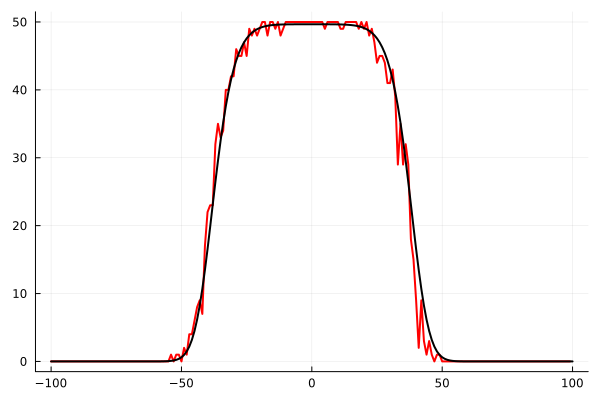

In [8]:
@time (data0,data,pos0,pos)=Stochastic(LX,LY,T,A0,PM,PP); #Calls the stochastic model, data below is the output used for reproducibility

data0=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.0, 28.0, 26.0, 31.0, 25.0, 27.0, 28.0, 28.0, 35.0, 23.0, 25.0, 22.0, 23.0, 20.0, 24.0, 27.0, 18.0, 25.0, 19.0, 24.0, 24.0, 18.0, 25.0, 23.0, 25.0, 25.0, 26.0, 25.0, 25.0, 23.0, 24.0, 24.0, 26.0, 29.0, 31.0, 30.0, 24.0, 25.0, 25.0, 19.0, 32.0, 21.0, 19.0, 25.0, 25.0, 26.0, 20.0, 22.0, 26.0, 31.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
data =[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 1.0, 4.0, 4.0, 6.0, 8.0, 9.0, 7.0, 17.0, 22.0, 23.0, 23.0, 32.0, 35.0, 33.0, 34.0, 40.0, 40.0, 42.0, 42.0, 46.0, 45.0, 45.0, 47.0, 45.0, 49.0, 48.0, 49.0, 48.0, 49.0, 50.0, 50.0, 48.0, 50.0, 50.0, 49.0, 50.0, 48.0, 49.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 49.0, 50.0, 50.0, 50.0, 50.0, 50.0, 49.0, 50.0, 49.0, 50.0, 48.0, 49.0, 47.0, 44.0, 45.0, 45.0, 44.0, 41.0, 41.0, 43.0, 39.0, 29.0, 35.0, 29.0, 32.0, 29.0, 18.0, 15.0, 9.0, 2.0, 9.0, 3.0, 1.0, 3.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
pos0 =[(76, 2), (76, 5), (76, 9), (76, 12), (76, 15), (76, 16), (76, 20), (76, 21), (76, 23), (76, 25), (76, 26), (76, 27), (76, 28), (76, 29), (76, 30), (76, 36), (76, 39), (76, 41), (76, 42), (76, 43), (76, 44), (76, 48), (77, 1), (77, 2), (77, 4), (77, 6), (77, 7), (77, 9), (77, 11), (77, 12), (77, 14), (77, 15), (77, 18), (77, 20), (77, 22), (77, 24), (77, 29), (77, 31), (77, 34), (77, 35), (77, 38), (77, 39), (77, 40), (77, 41), (77, 43), (77, 45), (77, 46), (77, 48), (77, 49), (77, 50), (78, 1), (78, 2), (78, 3), (78, 4), (78, 5), (78, 10), (78, 11), (78, 13), (78, 14), (78, 15), (78, 16), (78, 18), (78, 20), (78, 21), (78, 30), (78, 33), (78, 35), (78, 39), (78, 42), (78, 43), (78, 44), (78, 45), (78, 46), (78, 48), (78, 49), (78, 50), (79, 2), (79, 4), (79, 5), (79, 6), (79, 7), (79, 9), (79, 10), (79, 13), (79, 14), (79, 16), (79, 17), (79, 19), (79, 20), (79, 21), (79, 22), (79, 25), (79, 26), (79, 28), (79, 29), (79, 31), (79, 32), (79, 35), (79, 36), (79, 37), (79, 38), (79, 40), (79, 42), (79, 43), (79, 45), (79, 47), (79, 50), (80, 1), (80, 3), (80, 5), (80, 6), (80, 7), (80, 8), (80, 11), (80, 12), (80, 13), (80, 14), (80, 16), (80, 21), (80, 24), (80, 25), (80, 26), (80, 27), (80, 28), (80, 29), (80, 37), (80, 39), (80, 41), (80, 43), (80, 44), (80, 45), (80, 50), (81, 2), (81, 5), (81, 9), (81, 11), (81, 12), (81, 15), (81, 16), (81, 18), (81, 21), (81, 23), (81, 24), (81, 25), (81, 27), (81, 29), (81, 32), (81, 33), (81, 34), (81, 36), (81, 39), (81, 41), (81, 42), (81, 43), (81, 44), (81, 45), (81, 46), (81, 47), (81, 50), (82, 1), (82, 2), (82, 6), (82, 7), (82, 8), (82, 9), (82, 10), (82, 13), (82, 14), (82, 16), (82, 18), (82, 19), (82, 22), (82, 23), (82, 26), (82, 27), (82, 29), (82, 31), (82, 32), (82, 35), (82, 37), (82, 39), (82, 41), (82, 44), (82, 45), (82, 46), (82, 47), (82, 50), (83, 2), (83, 3), (83, 5), (83, 6), (83, 7), (83, 10), (83, 12), (83, 13), (83, 14), (83, 15), (83, 17), (83, 18), (83, 19), (83, 20), (83, 22), (83, 23), (83, 26), (83, 27), (83, 28), (83, 35), (83, 36), (83, 37), (83, 38), (83, 40), (83, 41), (83, 44), (83, 46), (83, 48), (84, 1), (84, 2), (84, 3), (84, 5), (84, 6), (84, 7), (84, 8), (84, 9), (84, 10), (84, 11), (84, 12), (84, 14), (84, 17), (84, 18), (84, 21), (84, 22), (84, 23), (84, 24), (84, 25), (84, 26), (84, 27), (84, 28), (84, 29), (84, 30), (84, 31), (84, 34), (84, 35), (84, 37), (84, 38), (84, 39), (84, 44), (84, 45), (84, 47), (84, 49), (84, 50), (85, 1), (85, 2), (85, 4), (85, 8), (85, 9), (85, 11), (85, 12), (85, 15), (85, 17), (85, 18), (85, 21), (85, 27), (85, 30), (85, 34), (85, 36), (85, 37), (85, 38), (85, 40), (85, 41), (85, 42), (85, 45), (85, 48), (85, 49), (86, 1), (86, 2), (86, 3), (86, 7), (86, 8), (86, 11), (86, 14), (86, 15), (86, 18), (86, 19), (86, 20), (86, 21), (86, 23), (86, 25), (86, 28), (86, 31), (86, 33), (86, 34), (86, 35), (86, 38), (86, 39), (86, 41), (86, 47), (86, 49), (86, 50), (87, 1), (87, 6), (87, 7), (87, 8), (87, 10), (87, 11), (87, 17), (87, 19), (87, 21), (87, 23), (87, 25), (87, 29), (87, 32), (87, 34), (87, 40), (87, 41), (87, 44), (87, 45), (87, 46), (87, 47), (87, 48), (87, 50), (88, 2), (88, 3), (88, 4), (88, 7), (88, 8), (88, 9), (88, 12), (88, 13), (88, 16), (88, 19), (88, 20), (88, 24), (88, 26), (88, 28), (88, 32), (88, 33), (88, 34), (88, 37), (88, 39), (88, 40), (88, 42), (88, 45), (88, 49), (89, 3), (89, 4), (89, 6), (89, 7), (89, 8), (89, 11), (89, 14), (89, 19), (89, 20), (89, 24), (89, 27), (89, 28), (89, 30), (89, 35), (89, 37), (89, 38), (89, 39), (89, 41), (89, 48), (89, 50), (90, 2), (90, 5), (90, 8), (90, 12), (90, 14), (90, 15), (90, 18), (90, 25), (90, 26), (90, 29), (90, 31), (90, 32), (90, 33), (90, 34), (90, 37), (90, 38), (90, 39), (90, 40), (90, 41), (90, 42), (90, 46), (90, 47), (90, 48), (90, 49), (91, 1), (91, 3), (91, 5), (91, 6), (91, 7), (91, 8), (91, 9), (91, 10), (91, 11), (91, 12), (91, 16), (91, 17), (91, 21), (91, 22), (91, 23), (91, 25), (91, 26), (91, 27), (91, 32), (91, 33), (91, 35), (91, 36), (91, 39), (91, 40), (91, 43), (91, 45), (91, 48), (92, 2), (92, 6), (92, 7), (92, 8), (92, 9), (92, 16), (92, 17), (92, 20), (92, 22), (92, 23), (92, 27), (92, 29), (92, 30), (92, 31), (92, 37), (92, 42), (92, 44), (92, 48), (93, 2), (93, 5), (93, 6), (93, 8), (93, 11), (93, 14), (93, 15), (93, 16), (93, 18), (93, 21), (93, 24), (93, 25), (93, 27), (93, 28), (93, 29), (93, 30), (93, 34), (93, 35), (93, 37), (93, 41), (93, 43), (93, 44), (93, 47), (93, 48), (93, 50), (94, 1), (94, 4), (94, 7), (94, 8), (94, 9), (94, 11), (94, 13), (94, 15), (94, 16), (94, 28), (94, 31), (94, 34), (94, 35), (94, 36), (94, 37), (94, 38), (94, 40), (94, 44), (94, 50), (95, 2), (95, 3), (95, 5), (95, 6), (95, 8), (95, 9), (95, 10), (95, 11), (95, 12), (95, 13), (95, 17), (95, 18), (95, 21), (95, 22), (95, 25), (95, 28), (95, 29), (95, 31), (95, 32), (95, 33), (95, 36), (95, 38), (95, 39), (95, 44), (96, 1), (96, 6), (96, 7), (96, 8), (96, 10), (96, 12), (96, 16), (96, 17), (96, 20), (96, 21), (96, 24), (96, 26), (96, 29), (96, 30), (96, 31), (96, 32), (96, 36), (96, 38), (96, 39), (96, 40), (96, 41), (96, 43), (96, 44), (96, 49), (97, 2), (97, 4), (97, 5), (97, 8), (97, 9), (97, 13), (97, 16), (97, 21), (97, 22), (97, 32), (97, 33), (97, 34), (97, 37), (97, 39), (97, 41), (97, 42), (97, 46), (97, 50), (98, 1), (98, 3), (98, 5), (98, 6), (98, 7), (98, 9), (98, 10), (98, 12), (98, 13), (98, 19), (98, 21), (98, 22), (98, 24), (98, 25), (98, 26), (98, 29), (98, 30), (98, 32), (98, 33), (98, 35), (98, 38), (98, 40), (98, 42), (98, 47), (98, 49), (99, 4), (99, 6), (99, 8), (99, 9), (99, 10), (99, 11), (99, 13), (99, 14), (99, 21), (99, 23), (99, 27), (99, 29), (99, 30), (99, 31), (99, 35), (99, 36), (99, 39), (99, 41), (99, 42), (99, 45), (99, 47), (99, 49), (99, 50), (100, 1), (100, 2), (100, 3), (100, 9), (100, 10), (100, 12), (100, 13), (100, 14), (100, 15), (100, 16), (100, 20), (100, 21), (100, 25), (100, 30), (100, 31), (100, 33), (100, 34), (100, 35), (100, 37), (100, 40), (100, 41), (100, 43), (100, 44), (100, 45), (100, 46), (101, 1), (101, 3), (101, 4), (101, 5), (101, 7), (101, 9), (101, 10), (101, 17), (101, 19), (101, 21), (101, 23), (101, 24), (101, 29), (101, 31), (101, 32), (101, 33), (101, 35), (101, 36), (101, 37), (101, 38), (101, 39), (101, 40), (101, 41), (101, 43), (101, 49), (102, 1), (102, 2), (102, 5), (102, 7), (102, 9), (102, 11), (102, 12), (102, 13), (102, 14), (102, 15), (102, 16), (102, 18), (102, 20), (102, 22), (102, 28), (102, 29), (102, 31), (102, 32), (102, 33), (102, 37), (102, 39), (102, 43), (102, 44), (102, 46), (102, 47), (102, 49), (103, 1), (103, 4), (103, 6), (103, 7), (103, 8), (103, 9), (103, 10), (103, 13), (103, 14), (103, 18), (103, 22), (103, 23), (103, 27), (103, 28), (103, 29), (103, 31), (103, 32), (103, 34), (103, 35), (103, 37), (103, 38), (103, 39), (103, 42), (103, 45), (103, 47), (104, 3), (104, 5), (104, 6), (104, 7), (104, 9), (104, 10), (104, 11), (104, 12), (104, 13), (104, 14), (104, 16), (104, 17), (104, 18), (104, 19), (104, 20), (104, 21), (104, 22), (104, 23), (104, 24), (104, 28), (104, 30), (104, 32), (104, 35), (104, 37), (104, 45), (105, 2), (105, 3), (105, 4), (105, 5), (105, 8), (105, 9), (105, 16), (105, 18), (105, 19), (105, 21), (105, 24), (105, 29), (105, 34), (105, 37), (105, 39), (105, 40), (105, 41), (105, 42), (105, 43), (105, 45), (105, 47), (105, 48), (105, 49), (106, 3), (106, 4), (106, 8), (106, 11), (106, 14), (106, 23), (106, 24), (106, 25), (106, 26), (106, 29), (106, 30), (106, 31), (106, 32), (106, 33), (106, 34), (106, 38), (106, 39), (106, 41), (106, 42), (106, 43), (106, 44), (106, 47), (106, 49), (106, 50), (107, 1), (107, 3), (107, 7), (107, 9), (107, 11), (107, 16), (107, 18), (107, 19), (107, 20), (107, 22), (107, 24), (107, 26), (107, 28), (107, 29), (107, 30), (107, 31), (107, 33), (107, 38), (107, 40), (107, 42), (107, 43), (107, 45), (107, 46), (107, 48), (108, 3), (108, 5), (108, 8), (108, 9), (108, 11), (108, 17), (108, 20), (108, 22), (108, 23), (108, 24), (108, 25), (108, 26), (108, 27), (108, 28), (108, 29), (108, 31), (108, 32), (108, 33), (108, 36), (108, 38), (108, 41), (108, 44), (108, 45), (108, 47), (108, 48), (108, 49), (109, 1), (109, 4), (109, 5), (109, 7), (109, 9), (109, 11), (109, 13), (109, 15), (109, 16), (109, 17), (109, 18), (109, 19), (109, 21), (109, 22), (109, 23), (109, 24), (109, 26), (109, 27), (109, 28), (109, 29), (109, 32), (109, 33), (109, 37), (109, 40), (109, 42), (109, 44), (109, 45), (109, 46), (109, 49), (110, 2), (110, 3), (110, 5), (110, 9), (110, 11), (110, 12), (110, 13), (110, 14), (110, 17), (110, 18), (110, 19), (110, 20), (110, 21), (110, 25), (110, 26), (110, 29), (110, 30), (110, 31), (110, 32), (110, 33), (110, 34), (110, 35), (110, 37), (110, 38), (110, 40), (110, 41), (110, 43), (110, 44), (110, 45), (110, 47), (110, 49), (111, 2), (111, 4), (111, 5), (111, 7), (111, 12), (111, 13), (111, 15), (111, 16), (111, 17), (111, 18), (111, 22), (111, 23), (111, 24), (111, 25), (111, 26), (111, 28), (111, 30), (111, 31), (111, 32), (111, 33), (111, 34), (111, 35), (111, 36), (111, 39), (111, 40), (111, 41), (111, 42), (111, 45), (111, 48), (111, 50), (112, 2), (112, 4), (112, 5), (112, 6), (112, 8), (112, 10), (112, 12), (112, 13), (112, 17), (112, 19), (112, 21), (112, 22), (112, 23), (112, 25), (112, 27), (112, 28), (112, 30), (112, 33), (112, 34), (112, 40), (112, 41), (112, 42), (112, 44), (112, 50), (113, 2), (113, 7), (113, 9), (113, 11), (113, 13), (113, 14), (113, 15), (113, 16), (113, 17), (113, 18), (113, 20), (113, 21), (113, 22), (113, 24), (113, 25), (113, 26), (113, 31), (113, 32), (113, 34), (113, 36), (113, 38), (113, 39), (113, 40), (113, 47), (113, 48), (114, 1), (114, 6), (114, 7), (114, 8), (114, 9), (114, 10), (114, 13), (114, 14), (114, 15), (114, 17), (114, 18), (114, 19), (114, 23), (114, 27), (114, 29), (114, 33), (114, 34), (114, 36), (114, 38), (114, 39), (114, 41), (114, 42), (114, 45), (114, 48), (114, 49), (115, 2), (115, 5), (115, 6), (115, 7), (115, 11), (115, 14), (115, 18), (115, 19), (115, 21), (115, 22), (115, 26), (115, 28), (115, 34), (115, 35), (115, 40), (115, 45), (115, 46), (115, 47), (115, 48), (116, 2), (116, 4), (116, 5), (116, 6), (116, 8), (116, 9), (116, 10), (116, 11), (116, 14), (116, 15), (116, 16), (116, 17), (116, 18), (116, 19), (116, 20), (116, 21), (116, 22), (116, 25), (116, 26), (116, 27), (116, 28), (116, 30), (116, 31), (116, 33), (116, 34), (116, 36), (116, 38), (116, 41), (116, 45), (116, 47), (116, 48), (116, 50), (117, 1), (117, 2), (117, 3), (117, 6), (117, 7), (117, 12), (117, 13), (117, 14), (117, 18), (117, 22), (117, 28), (117, 29), (117, 31), (117, 32), (117, 36), (117, 39), (117, 44), (117, 46), (117, 47), (117, 48), (117, 50), (118, 1), (118, 6), (118, 8), (118, 11), (118, 13), (118, 18), (118, 20), (118, 21), (118, 22), (118, 23), (118, 26), (118, 28), (118, 29), (118, 38), (118, 39), (118, 42), (118, 44), (118, 46), (118, 49), (119, 3), (119, 5), (119, 7), (119, 12), (119, 15), (119, 19), (119, 21), (119, 22), (119, 23), (119, 24), (119, 27), (119, 28), (119, 30), (119, 32), (119, 37), (119, 39), (119, 40), (119, 41), (119, 42), (119, 43), (119, 44), (119, 45), (119, 47), (119, 48), (119, 49), (120, 1), (120, 2), (120, 5), (120, 7), (120, 11), (120, 12), (120, 13), (120, 14), (120, 18), (120, 20), (120, 21), (120, 28), (120, 29), (120, 30), (120, 33), (120, 35), (120, 36), (120, 37), (120, 39), (120, 40), (120, 41), (120, 42), (120, 44), (120, 49), (120, 50), (121, 2), (121, 5), (121, 8), (121, 12), (121, 16), (121, 18), (121, 20), (121, 21), (121, 22), (121, 23), (121, 24), (121, 25), (121, 26), (121, 31), (121, 33), (121, 34), (121, 35), (121, 37), (121, 38), (121, 42), (121, 43), (121, 44), (121, 46), (121, 47), (121, 48), (121, 50), (122, 1), (122, 3), (122, 4), (122, 8), (122, 12), (122, 13), (122, 16), (122, 19), (122, 23), (122, 25), (122, 30), (122, 31), (122, 32), (122, 33), (122, 34), (122, 36), (122, 38), (122, 40), (122, 41), (122, 44), (123, 1), (123, 2), (123, 4), (123, 5), (123, 6), (123, 7), (123, 10), (123, 15), (123, 20), (123, 21), (123, 23), (123, 24), (123, 26), (123, 28), (123, 31), (123, 34), (123, 39), (123, 44), (123, 45), (123, 46), (123, 48), (123, 49), (124, 1), (124, 3), (124, 6), (124, 7), (124, 11), (124, 12), (124, 13), (124, 14), (124, 15), (124, 17), (124, 18), (124, 19), (124, 20), (124, 22), (124, 26), (124, 27), (124, 28), (124, 30), (124, 33), (124, 37), (124, 43), (124, 44), (124, 46), (124, 47), (124, 48), (124, 50), (125, 1), (125, 3), (125, 5), (125, 7), (125, 8), (125, 11), (125, 12), (125, 13), (125, 14), (125, 15), (125, 17), (125, 19), (125, 20), (125, 21), (125, 22), (125, 23), (125, 24), (125, 25), (125, 26), (125, 30), (125, 33), (125, 35), (125, 36), (125, 37), (125, 39), (125, 40), (125, 41), (125, 42), (125, 46), (125, 48), (125, 50), (126, 1), (126, 3), (126, 4), (126, 6), (126, 8), (126, 11), (126, 12), (126, 14), (126, 15), (126, 17), (126, 18), (126, 20), (126, 21), (126, 23), (126, 24), (126, 25), (126, 28), (126, 30), (126, 33), (126, 34), (126, 35), (126, 36), (126, 37), (126, 40), (126, 41), (126, 44), (126, 45), (126, 47), (126, 49), (126, 50)];
pos  = [(47, 15), (49, 47), (50, 48), (52, 15), (52, 47), (53, 6), (54, 9), (54, 20), (54, 46), (54, 50), (55, 14), (55, 20), (55, 44), (55, 49), (56, 2), (56, 7), (56, 11), (56, 45), (56, 47), (56, 49), (57, 9), (57, 11), (57, 13), (57, 26), (57, 47), (57, 48), (57, 49), (57, 50), (58, 6), (58, 8), (58, 9), (58, 27), (58, 30), (58, 36), (58, 39), (58, 46), (58, 50), (59, 9), (59, 33), (59, 35), (59, 38), (59, 40), (59, 42), (59, 49), (60, 3), (60, 4), (60, 5), (60, 7), (60, 9), (60, 11), (60, 13), (60, 18), (60, 26), (60, 29), (60, 32), (60, 43), (60, 45), (60, 46), (60, 48), (60, 49), (60, 50), (61, 1), (61, 3), (61, 5), (61, 8), (61, 10), (61, 11), (61, 12), (61, 14), (61, 15), (61, 17), (61, 18), (61, 19), (61, 20), (61, 27), (61, 30), (61, 42), (61, 43), (61, 44), (61, 46), (61, 47), (61, 49), (61, 50), (62, 2), (62, 3), (62, 6), (62, 7), (62, 9), (62, 12), (62, 17), (62, 18), (62, 20), (62, 22), (62, 24), (62, 25), (62, 26), (62, 27), (62, 28), (62, 35), (62, 41), (62, 43), (62, 44), (62, 45), (62, 46), (62, 48), (62, 50), (63, 1), (63, 3), (63, 4), (63, 6), (63, 7), (63, 8), (63, 11), (63, 14), (63, 15), (63, 16), (63, 17), (63, 20), (63, 21), (63, 24), (63, 25), (63, 29), (63, 33), (63, 34), (63, 36), (63, 37), (63, 44), (63, 45), (63, 47), (64, 1), (64, 2), (64, 3), (64, 4), (64, 5), (64, 7), (64, 8), (64, 9), (64, 13), (64, 14), (64, 16), (64, 17), (64, 18), (64, 20), (64, 21), (64, 22), (64, 23), (64, 24), (64, 27), (64, 30), (64, 33), (64, 35), (64, 36), (64, 39), (64, 41), (64, 42), (64, 44), (64, 45), (64, 47), (64, 48), (64, 49), (64, 50), (65, 2), (65, 3), (65, 4), (65, 5), (65, 6), (65, 7), (65, 8), (65, 9), (65, 11), (65, 12), (65, 15), (65, 16), (65, 17), (65, 18), (65, 20), (65, 21), (65, 22), (65, 23), (65, 24), (65, 26), (65, 27), (65, 28), (65, 30), (65, 32), (65, 33), (65, 38), (65, 40), (65, 41), (65, 43), (65, 44), (65, 45), (65, 46), (65, 47), (65, 48), (65, 49), (66, 2), (66, 3), (66, 5), (66, 6), (66, 8), (66, 9), (66, 13), (66, 14), (66, 17), (66, 18), (66, 19), (66, 24), (66, 25), (66, 27), (66, 28), (66, 29), (66, 31), (66, 32), (66, 33), (66, 34), (66, 35), (66, 36), (66, 38), (66, 39), (66, 41), (66, 42), (66, 43), (66, 44), (66, 46), (66, 47), (66, 48), (66, 49), (66, 50), (67, 1), (67, 2), (67, 4), (67, 5), (67, 6), (67, 8), (67, 9), (67, 12), (67, 13), (67, 15), (67, 16), (67, 17), (67, 18), (67, 19), (67, 20), (67, 24), (67, 25), (67, 28), (67, 29), (67, 30), (67, 31), (67, 32), (67, 35), (67, 36), (67, 37), (67, 40), (67, 41), (67, 43), (67, 44), (67, 46), (67, 47), (67, 48), (67, 49), (67, 50), (68, 1), (68, 4), (68, 5), (68, 6), (68, 7), (68, 9), (68, 12), (68, 13), (68, 14), (68, 15), (68, 16), (68, 18), (68, 19), (68, 20), (68, 21), (68, 22), (68, 24), (68, 25), (68, 26), (68, 27), (68, 28), (68, 29), (68, 30), (68, 31), (68, 32), (68, 33), (68, 34), (68, 35), (68, 36), (68, 37), (68, 38), (68, 39), (68, 40), (68, 41), (68, 43), (68, 44), (68, 45), (68, 47), (68, 48), (68, 49), (69, 1), (69, 3), (69, 4), (69, 5), (69, 6), (69, 7), (69, 8), (69, 9), (69, 11), (69, 12), (69, 13), (69, 14), (69, 15), (69, 16), (69, 17), (69, 18), (69, 19), (69, 21), (69, 22), (69, 23), (69, 24), (69, 26), (69, 27), (69, 29), (69, 31), (69, 33), (69, 35), (69, 37), (69, 38), (69, 39), (69, 40), (69, 41), (69, 43), (69, 44), (69, 45), (69, 46), (69, 47), (69, 48), (69, 49), (69, 50), (70, 1), (70, 2), (70, 3), (70, 4), (70, 7), (70, 8), (70, 9), (70, 10), (70, 11), (70, 12), (70, 13), (70, 14), (70, 15), (70, 16), (70, 17), (70, 18), (70, 20), (70, 22), (70, 23), (70, 24), (70, 25), (70, 26), (70, 27), (70, 29), (70, 30), (70, 31), (70, 32), (70, 33), (70, 34), (70, 35), (70, 36), (70, 37), (70, 38), (70, 39), (70, 42), (70, 43), (70, 44), (70, 46), (70, 47), (70, 48), (70, 49), (70, 50), (71, 2), (71, 3), (71, 5), (71, 6), (71, 7), (71, 8), (71, 9), (71, 10), (71, 11), (71, 12), (71, 13), (71, 15), (71, 16), (71, 17), (71, 19), (71, 20), (71, 22), (71, 23), (71, 24), (71, 25), (71, 26), (71, 27), (71, 28), (71, 30), (71, 32), (71, 33), (71, 34), (71, 35), (71, 36), (71, 37), (71, 39), (71, 40), (71, 41), (71, 42), (71, 43), (71, 44), (71, 45), (71, 46), (71, 47), (71, 48), (71, 49), (71, 50), (72, 1), (72, 2), (72, 3), (72, 4), (72, 5), (72, 6), (72, 7), (72, 8), (72, 9), (72, 10), (72, 11), (72, 12), (72, 13), (72, 14), (72, 15), (72, 16), (72, 18), (72, 19), (72, 20), (72, 21), (72, 22), (72, 23), (72, 25), (72, 26), (72, 27), (72, 29), (72, 30), (72, 31), (72, 32), (72, 33), (72, 34), (72, 35), (72, 36), (72, 37), (72, 38), (72, 39), (72, 40), (72, 41), (72, 42), (72, 43), (72, 44), (72, 45), (72, 46), (72, 48), (72, 49), (72, 50), (73, 1), (73, 2), (73, 3), (73, 6), (73, 7), (73, 8), (73, 10), (73, 11), (73, 12), (73, 13), (73, 14), (73, 15), (73, 16), (73, 17), (73, 18), (73, 19), (73, 20), (73, 21), (73, 23), (73, 24), (73, 25), (73, 26), (73, 27), (73, 28), (73, 29), (73, 30), (73, 31), (73, 32), (73, 33), (73, 34), (73, 35), (73, 36), (73, 37), (73, 38), (73, 39), (73, 40), (73, 41), (73, 42), (73, 43), (73, 44), (73, 45), (73, 46), (73, 47), (73, 48), (73, 49), (74, 1), (74, 2), (74, 3), (74, 4), (74, 5), (74, 6), (74, 8), (74, 10), (74, 11), (74, 12), (74, 13), (74, 14), (74, 15), (74, 16), (74, 17), (74, 19), (74, 20), (74, 21), (74, 22), (74, 23), (74, 24), (74, 25), (74, 26), (74, 28), (74, 29), (74, 30), (74, 31), (74, 32), (74, 33), (74, 34), (74, 35), (74, 36), (74, 37), (74, 38), (74, 39), (74, 40), (74, 41), (74, 42), (74, 43), (74, 44), (74, 45), (74, 47), (74, 48), (74, 49), (74, 50), (75, 1), (75, 2), (75, 3), (75, 4), (75, 5), (75, 7), (75, 8), (75, 9), (75, 10), (75, 11), (75, 12), (75, 13), (75, 14), (75, 15), (75, 16), (75, 17), (75, 18), (75, 19), (75, 20), (75, 21), (75, 22), (75, 23), (75, 24), (75, 25), (75, 26), (75, 27), (75, 29), (75, 30), (75, 31), (75, 32), (75, 33), (75, 34), (75, 35), (75, 37), (75, 38), (75, 39), (75, 40), (75, 41), (75, 42), (75, 43), (75, 44), (75, 45), (75, 46), (75, 47), (75, 48), (75, 49), (75, 50), (76, 1), (76, 2), (76, 3), (76, 4), (76, 5), (76, 6), (76, 7), (76, 8), (76, 9), (76, 10), (76, 11), (76, 12), (76, 14), (76, 15), (76, 16), (76, 17), (76, 18), (76, 19), (76, 20), (76, 21), (76, 22), (76, 23), (76, 24), (76, 25), (76, 26), (76, 29), (76, 30), (76, 31), (76, 32), (76, 33), (76, 34), (76, 35), (76, 36), (76, 37), (76, 38), (76, 39), (76, 40), (76, 41), (76, 42), (76, 43), (76, 45), (76, 46), (76, 47), (76, 48), (76, 50), (77, 1), (77, 2), (77, 3), (77, 4), (77, 5), (77, 6), (77, 7), (77, 8), (77, 9), (77, 10), (77, 11), (77, 12), (77, 13), (77, 14), (77, 15), (77, 16), (77, 17), (77, 18), (77, 19), (77, 20), (77, 21), (77, 22), (77, 23), (77, 24), (77, 25), (77, 26), (77, 27), (77, 28), (77, 29), (77, 30), (77, 31), (77, 32), (77, 33), (77, 34), (77, 35), (77, 36), (77, 37), (77, 38), (77, 39), (77, 40), (77, 41), (77, 43), (77, 44), (77, 45), (77, 46), (77, 47), (77, 48), (77, 49), (77, 50), (78, 1), (78, 2), (78, 3), (78, 4), (78, 5), (78, 6), (78, 7), (78, 8), (78, 9), (78, 10), (78, 11), (78, 12), (78, 13), (78, 14), (78, 15), (78, 16), (78, 17), (78, 18), (78, 19), (78, 20), (78, 21), (78, 22), (78, 23), (78, 24), (78, 25), (78, 26), (78, 27), (78, 28), (78, 29), (78, 30), (78, 31), (78, 32), (78, 33), (78, 34), (78, 35), (78, 36), (78, 38), (78, 40), (78, 41), (78, 42), (78, 43), (78, 44), (78, 45), (78, 46), (78, 47), (78, 48), (78, 49), (78, 50), (79, 1), (79, 2), (79, 3), (79, 4), (79, 5), (79, 6), (79, 7), (79, 8), (79, 9), (79, 10), (79, 11), (79, 12), (79, 13), (79, 14), (79, 15), (79, 16), (79, 17), (79, 18), (79, 19), (79, 20), (79, 21), (79, 22), (79, 23), (79, 24), (79, 25), (79, 26), (79, 27), (79, 28), (79, 29), (79, 30), (79, 31), (79, 32), (79, 33), (79, 34), (79, 35), (79, 36), (79, 37), (79, 38), (79, 39), (79, 40), (79, 41), (79, 43), (79, 44), (79, 45), (79, 46), (79, 47), (79, 48), (79, 49), (79, 50), (80, 1), (80, 2), (80, 3), (80, 4), (80, 5), (80, 6), (80, 7), (80, 8), (80, 9), (80, 10), (80, 11), (80, 12), (80, 13), (80, 14), (80, 15), (80, 16), (80, 17), (80, 18), (80, 19), (80, 20), (80, 21), (80, 22), (80, 23), (80, 24), (80, 25), (80, 26), (80, 27), (80, 28), (80, 29), (80, 30), (80, 32), (80, 33), (80, 34), (80, 35), (80, 36), (80, 37), (80, 38), (80, 39), (80, 40), (80, 41), (80, 42), (80, 43), (80, 44), (80, 45), (80, 46), (80, 47), (80, 48), (80, 49), (81, 1), (81, 2), (81, 3), (81, 4), (81, 5), (81, 6), (81, 7), (81, 8), (81, 9), (81, 10), (81, 11), (81, 12), (81, 13), (81, 14), (81, 15), (81, 16), (81, 17), (81, 18), (81, 19), (81, 20), (81, 21), (81, 22), (81, 23), (81, 24), (81, 25), (81, 26), (81, 27), (81, 28), (81, 29), (81, 30), (81, 31), (81, 32), (81, 33), (81, 34), (81, 35), (81, 36), (81, 37), (81, 38), (81, 39), (81, 40), (81, 41), (81, 42), (81, 44), (81, 45), (81, 46), (81, 47), (81, 48), (81, 49), (81, 50), (82, 1), (82, 2), (82, 3), (82, 4), (82, 5), (82, 6), (82, 7), (82, 8), (82, 9), (82, 10), (82, 11), (82, 12), (82, 13), (82, 14), (82, 15), (82, 16), (82, 17), (82, 18), (82, 19), (82, 20), (82, 21), (82, 22), (82, 23), (82, 24), (82, 25), (82, 26), (82, 27), (82, 28), (82, 29), (82, 30), (82, 31), (82, 32), (82, 33), (82, 34), (82, 35), (82, 36), (82, 37), (82, 38), (82, 39), (82, 40), (82, 41), (82, 42), (82, 43), (82, 44), (82, 45), (82, 46), (82, 47), (82, 48), (82, 49), (82, 50), (83, 1), (83, 2), (83, 3), (83, 4), (83, 5), (83, 6), (83, 7), (83, 8), (83, 9), (83, 10), (83, 11), (83, 12), (83, 13), (83, 14), (83, 15), (83, 16), (83, 17), (83, 18), (83, 19), (83, 20), (83, 21), (83, 22), (83, 23), (83, 24), (83, 25), (83, 26), (83, 27), (83, 28), (83, 29), (83, 30), (83, 31), (83, 32), (83, 33), (83, 34), (83, 35), (83, 36), (83, 37), (83, 38), (83, 39), (83, 40), (83, 41), (83, 42), (83, 43), (83, 44), (83, 45), (83, 46), (83, 47), (83, 48), (83, 49), (83, 50), (84, 2), (84, 3), (84, 4), (84, 5), (84, 6), (84, 7), (84, 8), (84, 9), (84, 10), (84, 11), (84, 12), (84, 13), (84, 14), (84, 15), (84, 16), (84, 17), (84, 18), (84, 19), (84, 20), (84, 21), (84, 22), (84, 23), (84, 24), (84, 25), (84, 26), (84, 27), (84, 28), (84, 29), (84, 31), (84, 32), (84, 33), (84, 34), (84, 35), (84, 36), (84, 37), (84, 38), (84, 39), (84, 40), (84, 41), (84, 42), (84, 43), (84, 44), (84, 45), (84, 46), (84, 47), (84, 48), (84, 49), (84, 50), (85, 1), (85, 2), (85, 3), (85, 4), (85, 5), (85, 6), (85, 7), (85, 8), (85, 9), (85, 10), (85, 11), (85, 12), (85, 13), (85, 14), (85, 15), (85, 16), (85, 17), (85, 18), (85, 19), (85, 20), (85, 21), (85, 22), (85, 23), (85, 24), (85, 25), (85, 26), (85, 27), (85, 28), (85, 29), (85, 30), (85, 31), (85, 32), (85, 33), (85, 34), (85, 35), (85, 36), (85, 37), (85, 38), (85, 39), (85, 40), (85, 41), (85, 42), (85, 43), (85, 44), (85, 45), (85, 46), (85, 47), (85, 48), (85, 49), (85, 50), (86, 1), (86, 2), (86, 3), (86, 4), (86, 5), (86, 6), (86, 7), (86, 8), (86, 9), (86, 10), (86, 11), (86, 12), (86, 13), (86, 14), (86, 15), (86, 16), (86, 17), (86, 18), (86, 19), (86, 20), (86, 21), (86, 22), (86, 23), (86, 24), (86, 25), (86, 26), (86, 27), (86, 28), (86, 29), (86, 30), (86, 31), (86, 32), (86, 33), (86, 34), (86, 35), (86, 36), (86, 37), (86, 38), (86, 39), (86, 40), (86, 41), (86, 42), (86, 43), (86, 44), (86, 45), (86, 46), (86, 47), (86, 48), (86, 49), (86, 50), (87, 1), (87, 2), (87, 3), (87, 4), (87, 5), (87, 6), (87, 7), (87, 8), (87, 9), (87, 10), (87, 11), (87, 12), (87, 13), (87, 14), (87, 15), (87, 16), (87, 17), (87, 18), (87, 19), (87, 20), (87, 21), (87, 22), (87, 23), (87, 24), (87, 25), (87, 26), (87, 27), (87, 29), (87, 30), (87, 31), (87, 32), (87, 33), (87, 34), (87, 35), (87, 36), (87, 37), (87, 38), (87, 39), (87, 40), (87, 41), (87, 42), (87, 43), (87, 44), (87, 45), (87, 46), (87, 47), (87, 48), (87, 49), (87, 50), (88, 1), (88, 2), (88, 3), (88, 4), (88, 5), (88, 6), (88, 7), (88, 8), (88, 9), (88, 10), (88, 11), (88, 12), (88, 13), (88, 14), (88, 15), (88, 16), (88, 17), (88, 18), (88, 19), (88, 20), (88, 21), (88, 22), (88, 23), (88, 24), (88, 25), (88, 26), (88, 27), (88, 28), (88, 29), (88, 30), (88, 31), (88, 32), (88, 33), (88, 34), (88, 35), (88, 36), (88, 37), (88, 38), (88, 39), (88, 40), (88, 41), (88, 42), (88, 43), (88, 44), (88, 45), (88, 46), (88, 47), (88, 48), (88, 49), (88, 50), (89, 1), (89, 2), (89, 3), (89, 4), (89, 5), (89, 6), (89, 7), (89, 9), (89, 10), (89, 11), (89, 12), (89, 13), (89, 14), (89, 15), (89, 16), (89, 17), (89, 18), (89, 19), (89, 20), (89, 21), (89, 22), (89, 23), (89, 24), (89, 25), (89, 26), (89, 27), (89, 28), (89, 29), (89, 30), (89, 31), (89, 32), (89, 33), (89, 34), (89, 35), (89, 36), (89, 37), (89, 38), (89, 39), (89, 40), (89, 41), (89, 42), (89, 43), (89, 44), (89, 45), (89, 46), (89, 47), (89, 49), (89, 50), (90, 1), (90, 2), (90, 3), (90, 4), (90, 5), (90, 6), (90, 7), (90, 8), (90, 9), (90, 10), (90, 11), (90, 12), (90, 13), (90, 14), (90, 15), (90, 16), (90, 17), (90, 18), (90, 19), (90, 20), (90, 21), (90, 22), (90, 23), (90, 24), (90, 25), (90, 26), (90, 27), (90, 28), (90, 29), (90, 30), (90, 31), (90, 32), (90, 33), (90, 34), (90, 35), (90, 36), (90, 37), (90, 38), (90, 40), (90, 41), (90, 42), (90, 43), (90, 44), (90, 45), (90, 46), (90, 47), (90, 48), (90, 49), (90, 50), (91, 1), (91, 2), (91, 3), (91, 4), (91, 5), (91, 6), (91, 7), (91, 8), (91, 9), (91, 10), (91, 11), (91, 12), (91, 13), (91, 14), (91, 15), (91, 16), (91, 17), (91, 18), (91, 19), (91, 20), (91, 21), (91, 22), (91, 23), (91, 24), (91, 25), (91, 26), (91, 27), (91, 28), (91, 29), (91, 30), (91, 31), (91, 32), (91, 33), (91, 34), (91, 35), (91, 36), (91, 37), (91, 38), (91, 39), (91, 40), (91, 41), (91, 42), (91, 43), (91, 44), (91, 45), (91, 46), (91, 47), (91, 48), (91, 49), (91, 50), (92, 1), (92, 2), (92, 3), (92, 4), (92, 5), (92, 6), (92, 7), (92, 8), (92, 9), (92, 10), (92, 11), (92, 12), (92, 13), (92, 14), (92, 15), (92, 16), (92, 17), (92, 18), (92, 19), (92, 20), (92, 21), (92, 22), (92, 23), (92, 24), (92, 25), (92, 26), (92, 27), (92, 28), (92, 29), (92, 30), (92, 31), (92, 32), (92, 33), (92, 34), (92, 35), (92, 36), (92, 37), (92, 38), (92, 39), (92, 40), (92, 41), (92, 42), (92, 43), (92, 44), (92, 45), (92, 46), (92, 47), (92, 48), (92, 49), (92, 50), (93, 1), (93, 2), (93, 3), (93, 4), (93, 5), (93, 6), (93, 7), (93, 8), (93, 9), (93, 10), (93, 11), (93, 12), (93, 13), (93, 14), (93, 15), (93, 16), (93, 17), (93, 18), (93, 19), (93, 20), (93, 21), (93, 22), (93, 23), (93, 24), (93, 25), (93, 26), (93, 27), (93, 28), (93, 29), (93, 30), (93, 31), (93, 32), (93, 33), (93, 34), (93, 35), (93, 36), (93, 37), (93, 38), (93, 39), (93, 40), (93, 41), (93, 42), (93, 43), (93, 44), (93, 45), (93, 46), (93, 47), (93, 48), (93, 49), (93, 50), (94, 1), (94, 2), (94, 3), (94, 4), (94, 5), (94, 6), (94, 7), (94, 8), (94, 9), (94, 10), (94, 11), (94, 12), (94, 13), (94, 14), (94, 15), (94, 16), (94, 17), (94, 18), (94, 19), (94, 20), (94, 21), (94, 22), (94, 23), (94, 24), (94, 25), (94, 26), (94, 27), (94, 28), (94, 29), (94, 30), (94, 31), (94, 32), (94, 33), (94, 34), (94, 35), (94, 36), (94, 37), (94, 38), (94, 39), (94, 40), (94, 41), (94, 42), (94, 43), (94, 44), (94, 45), (94, 46), (94, 47), (94, 48), (94, 49), (94, 50), (95, 1), (95, 2), (95, 3), (95, 4), (95, 5), (95, 6), (95, 7), (95, 8), (95, 9), (95, 10), (95, 11), (95, 12), (95, 13), (95, 14), (95, 15), (95, 16), (95, 17), (95, 18), (95, 19), (95, 20), (95, 21), (95, 22), (95, 23), (95, 24), (95, 25), (95, 26), (95, 27), (95, 28), (95, 29), (95, 30), (95, 31), (95, 32), (95, 33), (95, 34), (95, 35), (95, 36), (95, 37), (95, 38), (95, 39), (95, 40), (95, 41), (95, 42), (95, 43), (95, 44), (95, 45), (95, 46), (95, 47), (95, 48), (95, 49), (95, 50), (96, 1), (96, 2), (96, 3), (96, 4), (96, 5), (96, 6), (96, 7), (96, 8), (96, 9), (96, 10), (96, 11), (96, 12), (96, 13), (96, 14), (96, 15), (96, 16), (96, 17), (96, 18), (96, 19), (96, 20), (96, 21), (96, 22), (96, 23), (96, 24), (96, 25), (96, 26), (96, 27), (96, 28), (96, 29), (96, 30), (96, 31), (96, 32), (96, 33), (96, 34), (96, 35), (96, 36), (96, 37), (96, 38), (96, 39), (96, 40), (96, 41), (96, 42), (96, 43), (96, 44), (96, 45), (96, 46), (96, 47), (96, 48), (96, 49), (96, 50), (97, 1), (97, 2), (97, 3), (97, 4), (97, 5), (97, 6), (97, 7), (97, 8), (97, 9), (97, 10), (97, 11), (97, 12), (97, 13), (97, 14), (97, 15), (97, 16), (97, 17), (97, 18), (97, 19), (97, 20), (97, 21), (97, 22), (97, 23), (97, 24), (97, 25), (97, 26), (97, 27), (97, 28), (97, 29), (97, 30), (97, 31), (97, 32), (97, 33), (97, 34), (97, 35), (97, 36), (97, 37), (97, 38), (97, 39), (97, 40), (97, 41), (97, 42), (97, 43), (97, 44), (97, 45), (97, 46), (97, 47), (97, 48), (97, 49), (97, 50), (98, 1), (98, 2), (98, 3), (98, 4), (98, 5), (98, 6), (98, 7), (98, 8), (98, 9), (98, 10), (98, 11), (98, 12), (98, 13), (98, 14), (98, 15), (98, 16), (98, 17), (98, 18), (98, 19), (98, 20), (98, 21), (98, 22), (98, 23), (98, 24), (98, 25), (98, 26), (98, 27), (98, 28), (98, 29), (98, 30), (98, 31), (98, 32), (98, 33), (98, 34), (98, 35), (98, 36), (98, 37), (98, 38), (98, 39), (98, 40), (98, 41), (98, 42), (98, 43), (98, 44), (98, 45), (98, 46), (98, 47), (98, 48), (98, 49), (98, 50), (99, 1), (99, 2), (99, 3), (99, 4), (99, 5), (99, 6), (99, 7), (99, 8), (99, 9), (99, 10), (99, 11), (99, 12), (99, 13), (99, 14), (99, 15), (99, 16), (99, 17), (99, 18), (99, 19), (99, 20), (99, 21), (99, 22), (99, 23), (99, 24), (99, 25), (99, 26), (99, 27), (99, 28), (99, 29), (99, 30), (99, 31), (99, 32), (99, 33), (99, 34), (99, 35), (99, 36), (99, 37), (99, 38), (99, 39), (99, 40), (99, 41), (99, 42), (99, 43), (99, 44), (99, 45), (99, 46), (99, 47), (99, 48), (99, 49), (99, 50), (100, 1), (100, 2), (100, 3), (100, 4), (100, 5), (100, 6), (100, 7), (100, 8), (100, 9), (100, 10), (100, 11), (100, 12), (100, 13), (100, 14), (100, 15), (100, 16), (100, 17), (100, 18), (100, 19), (100, 20), (100, 21), (100, 22), (100, 23), (100, 24), (100, 25), (100, 26), (100, 27), (100, 28), (100, 29), (100, 30), (100, 31), (100, 32), (100, 33), (100, 34), (100, 35), (100, 36), (100, 37), (100, 38), (100, 39), (100, 40), (100, 41), (100, 42), (100, 43), (100, 44), (100, 45), (100, 46), (100, 47), (100, 48), (100, 49), (100, 50), (101, 1), (101, 2), (101, 3), (101, 4), (101, 5), (101, 6), (101, 7), (101, 8), (101, 9), (101, 10), (101, 11), (101, 12), (101, 13), (101, 14), (101, 15), (101, 16), (101, 17), (101, 18), (101, 19), (101, 20), (101, 21), (101, 22), (101, 23), (101, 24), (101, 25), (101, 26), (101, 27), (101, 28), (101, 29), (101, 30), (101, 31), (101, 32), (101, 33), (101, 34), (101, 35), (101, 36), (101, 37), (101, 38), (101, 39), (101, 40), (101, 41), (101, 42), (101, 43), (101, 44), (101, 45), (101, 46), (101, 47), (101, 48), (101, 49), (101, 50), (102, 1), (102, 2), (102, 3), (102, 4), (102, 5), (102, 6), (102, 7), (102, 8), (102, 9), (102, 10), (102, 11), (102, 12), (102, 13), (102, 14), (102, 15), (102, 16), (102, 17), (102, 18), (102, 19), (102, 20), (102, 21), (102, 22), (102, 23), (102, 24), (102, 25), (102, 26), (102, 27), (102, 28), (102, 29), (102, 30), (102, 31), (102, 32), (102, 33), (102, 34), (102, 35), (102, 36), (102, 37), (102, 38), (102, 39), (102, 40), (102, 41), (102, 42), (102, 43), (102, 44), (102, 45), (102, 46), (102, 47), (102, 48), (102, 49), (102, 50), (103, 1), (103, 2), (103, 3), (103, 4), (103, 5), (103, 6), (103, 7), (103, 8), (103, 9), (103, 10), (103, 11), (103, 12), (103, 13), (103, 14), (103, 15), (103, 16), (103, 17), (103, 18), (103, 19), (103, 20), (103, 21), (103, 22), (103, 23), (103, 24), (103, 25), (103, 26), (103, 27), (103, 28), (103, 29), (103, 30), (103, 31), (103, 32), (103, 33), (103, 34), (103, 35), (103, 36), (103, 37), (103, 38), (103, 39), (103, 40), (103, 41), (103, 42), (103, 43), (103, 44), (103, 45), (103, 46), (103, 47), (103, 48), (103, 49), (103, 50), (104, 1), (104, 2), (104, 3), (104, 4), (104, 5), (104, 6), (104, 7), (104, 8), (104, 9), (104, 10), (104, 11), (104, 12), (104, 13), (104, 14), (104, 15), (104, 16), (104, 17), (104, 18), (104, 19), (104, 20), (104, 21), (104, 22), (104, 23), (104, 24), (104, 25), (104, 26), (104, 27), (104, 28), (104, 29), (104, 30), (104, 31), (104, 32), (104, 33), (104, 34), (104, 35), (104, 36), (104, 37), (104, 38), (104, 39), (104, 40), (104, 41), (104, 42), (104, 43), (104, 44), (104, 45), (104, 46), (104, 47), (104, 48), (104, 49), (104, 50), (105, 1), (105, 2), (105, 3), (105, 4), (105, 5), (105, 6), (105, 7), (105, 8), (105, 9), (105, 10), (105, 11), (105, 12), (105, 13), (105, 14), (105, 15), (105, 16), (105, 17), (105, 18), (105, 19), (105, 20), (105, 21), (105, 22), (105, 23), (105, 24), (105, 25), (105, 26), (105, 27), (105, 28), (105, 29), (105, 30), (105, 31), (105, 32), (105, 33), (105, 34), (105, 35), (105, 36), (105, 37), (105, 38), (105, 39), (105, 40), (105, 41), (105, 42), (105, 43), (105, 44), (105, 45), (105, 46), (105, 47), (105, 48), (105, 49), (105, 50), (106, 1), (106, 2), (106, 3), (106, 4), (106, 5), (106, 6), (106, 7), (106, 8), (106, 9), (106, 10), (106, 11), (106, 12), (106, 13), (106, 14), (106, 15), (106, 16), (106, 17), (106, 18), (106, 19), (106, 20), (106, 21), (106, 22), (106, 23), (106, 24), (106, 25), (106, 26), (106, 27), (106, 28), (106, 29), (106, 30), (106, 31), (106, 32), (106, 33), (106, 34), (106, 35), (106, 36), (106, 37), (106, 38), (106, 39), (106, 40), (106, 41), (106, 42), (106, 43), (106, 44), (106, 46), (106, 47), (106, 48), (106, 49), (106, 50), (107, 1), (107, 2), (107, 3), (107, 4), (107, 5), (107, 6), (107, 7), (107, 8), (107, 9), (107, 10), (107, 11), (107, 12), (107, 13), (107, 14), (107, 15), (107, 16), (107, 17), (107, 18), (107, 19), (107, 20), (107, 21), (107, 22), (107, 23), (107, 24), (107, 25), (107, 26), (107, 27), (107, 28), (107, 29), (107, 30), (107, 31), (107, 32), (107, 33), (107, 34), (107, 35), (107, 36), (107, 37), (107, 38), (107, 39), (107, 40), (107, 41), (107, 42), (107, 43), (107, 44), (107, 45), (107, 46), (107, 47), (107, 48), (107, 49), (107, 50), (108, 1), (108, 2), (108, 3), (108, 4), (108, 5), (108, 6), (108, 7), (108, 8), (108, 9), (108, 10), (108, 11), (108, 12), (108, 13), (108, 14), (108, 15), (108, 16), (108, 17), (108, 18), (108, 19), (108, 20), (108, 21), (108, 22), (108, 23), (108, 24), (108, 25), (108, 26), (108, 27), (108, 28), (108, 29), (108, 30), (108, 31), (108, 32), (108, 33), (108, 34), (108, 35), (108, 36), (108, 37), (108, 38), (108, 39), (108, 40), (108, 41), (108, 42), (108, 43), (108, 44), (108, 45), (108, 46), (108, 47), (108, 48), (108, 49), (108, 50), (109, 1), (109, 2), (109, 3), (109, 4), (109, 5), (109, 6), (109, 7), (109, 8), (109, 9), (109, 10), (109, 11), (109, 12), (109, 13), (109, 14), (109, 15), (109, 16), (109, 17), (109, 18), (109, 19), (109, 20), (109, 21), (109, 22), (109, 23), (109, 24), (109, 25), (109, 26), (109, 27), (109, 28), (109, 29), (109, 30), (109, 31), (109, 32), (109, 33), (109, 34), (109, 35), (109, 36), (109, 37), (109, 38), (109, 39), (109, 40), (109, 41), (109, 42), (109, 43), (109, 44), (109, 45), (109, 46), (109, 47), (109, 48), (109, 49), (109, 50), (110, 1), (110, 2), (110, 3), (110, 4), (110, 5), (110, 6), (110, 7), (110, 8), (110, 9), (110, 10), (110, 11), (110, 12), (110, 13), (110, 14), (110, 15), (110, 16), (110, 17), (110, 18), (110, 19), (110, 20), (110, 21), (110, 22), (110, 23), (110, 24), (110, 25), (110, 26), (110, 27), (110, 28), (110, 29), (110, 30), (110, 31), (110, 32), (110, 33), (110, 34), (110, 35), (110, 36), (110, 37), (110, 38), (110, 39), (110, 40), (110, 41), (110, 42), (110, 43), (110, 44), (110, 45), (110, 46), (110, 47), (110, 48), (110, 49), (110, 50), (111, 1), (111, 2), (111, 3), (111, 4), (111, 5), (111, 6), (111, 7), (111, 8), (111, 9), (111, 10), (111, 11), (111, 12), (111, 13), (111, 14), (111, 15), (111, 16), (111, 17), (111, 18), (111, 19), (111, 20), (111, 21), (111, 22), (111, 23), (111, 24), (111, 25), (111, 26), (111, 27), (111, 28), (111, 29), (111, 30), (111, 31), (111, 32), (111, 33), (111, 34), (111, 35), (111, 36), (111, 37), (111, 38), (111, 39), (111, 40), (111, 41), (111, 42), (111, 43), (111, 44), (111, 45), (111, 46), (111, 47), (111, 48), (111, 49), (111, 50), (112, 1), (112, 2), (112, 3), (112, 4), (112, 5), (112, 6), (112, 7), (112, 8), (112, 9), (112, 10), (112, 11), (112, 12), (112, 13), (112, 14), (112, 15), (112, 16), (112, 17), (112, 18), (112, 19), (112, 20), (112, 21), (112, 22), (112, 23), (112, 24), (112, 25), (112, 27), (112, 28), (112, 29), (112, 30), (112, 31), (112, 32), (112, 33), (112, 34), (112, 35), (112, 36), (112, 37), (112, 38), (112, 39), (112, 40), (112, 41), (112, 42), (112, 43), (112, 44), (112, 45), (112, 46), (112, 47), (112, 48), (112, 49), (112, 50), (113, 1), (113, 2), (113, 3), (113, 4), (113, 5), (113, 6), (113, 7), (113, 8), (113, 9), (113, 10), (113, 11), (113, 12), (113, 14), (113, 15), (113, 16), (113, 17), (113, 18), (113, 19), (113, 20), (113, 21), (113, 22), (113, 23), (113, 24), (113, 25), (113, 26), (113, 27), (113, 28), (113, 29), (113, 30), (113, 31), (113, 32), (113, 33), (113, 34), (113, 35), (113, 36), (113, 37), (113, 38), (113, 39), (113, 40), (113, 41), (113, 42), (113, 43), (113, 44), (113, 45), (113, 46), (113, 47), (113, 48), (113, 49), (113, 50), (114, 1), (114, 2), (114, 3), (114, 4), (114, 5), (114, 6), (114, 7), (114, 8), (114, 9), (114, 10), (114, 11), (114, 12), (114, 13), (114, 14), (114, 15), (114, 16), (114, 17), (114, 18), (114, 19), (114, 20), (114, 21), (114, 22), (114, 23), (114, 24), (114, 25), (114, 26), (114, 27), (114, 28), (114, 29), (114, 30), (114, 31), (114, 32), (114, 33), (114, 34), (114, 35), (114, 36), (114, 37), (114, 38), (114, 39), (114, 40), (114, 41), (114, 42), (114, 43), (114, 44), (114, 45), (114, 46), (114, 47), (114, 48), (114, 49), (114, 50), (115, 1), (115, 2), (115, 3), (115, 4), (115, 5), (115, 6), (115, 7), (115, 8), (115, 9), (115, 10), (115, 11), (115, 12), (115, 13), (115, 14), (115, 15), (115, 16), (115, 17), (115, 18), (115, 19), (115, 20), (115, 21), (115, 22), (115, 23), (115, 24), (115, 25), (115, 26), (115, 27), (115, 28), (115, 29), (115, 30), (115, 31), (115, 32), (115, 33), (115, 34), (115, 35), (115, 36), (115, 37), (115, 38), (115, 39), (115, 40), (115, 41), (115, 42), (115, 43), (115, 44), (115, 45), (115, 46), (115, 47), (115, 48), (115, 49), (115, 50), (116, 1), (116, 2), (116, 3), (116, 4), (116, 5), (116, 6), (116, 7), (116, 8), (116, 9), (116, 10), (116, 11), (116, 12), (116, 13), (116, 14), (116, 15), (116, 16), (116, 17), (116, 18), (116, 19), (116, 20), (116, 21), (116, 22), (116, 23), (116, 24), (116, 25), (116, 26), (116, 27), (116, 28), (116, 29), (116, 30), (116, 31), (116, 32), (116, 33), (116, 34), (116, 35), (116, 36), (116, 37), (116, 38), (116, 39), (116, 40), (116, 41), (116, 42), (116, 43), (116, 44), (116, 45), (116, 46), (116, 47), (116, 48), (116, 49), (116, 50), (117, 1), (117, 2), (117, 3), (117, 4), (117, 5), (117, 6), (117, 7), (117, 8), (117, 9), (117, 10), (117, 11), (117, 12), (117, 13), (117, 14), (117, 15), (117, 16), (117, 17), (117, 18), (117, 19), (117, 20), (117, 21), (117, 22), (117, 23), (117, 24), (117, 25), (117, 26), (117, 27), (117, 28), (117, 29), (117, 30), (117, 31), (117, 32), (117, 33), (117, 34), (117, 35), (117, 36), (117, 37), (117, 38), (117, 39), (117, 40), (117, 41), (117, 42), (117, 43), (117, 44), (117, 45), (117, 46), (117, 47), (117, 48), (117, 49), (117, 50), (118, 1), (118, 2), (118, 3), (118, 4), (118, 5), (118, 6), (118, 7), (118, 8), (118, 9), (118, 10), (118, 11), (118, 12), (118, 13), (118, 14), (118, 15), (118, 16), (118, 17), (118, 18), (118, 19), (118, 20), (118, 21), (118, 22), (118, 23), (118, 24), (118, 25), (118, 26), (118, 27), (118, 28), (118, 29), (118, 30), (118, 31), (118, 32), (118, 33), (118, 34), (118, 35), (118, 36), (118, 37), (118, 38), (118, 39), (118, 40), (118, 41), (118, 42), (118, 43), (118, 44), (118, 45), (118, 46), (118, 47), (118, 48), (118, 49), (118, 50), (119, 1), (119, 2), (119, 3), (119, 4), (119, 5), (119, 6), (119, 7), (119, 8), (119, 9), (119, 10), (119, 11), (119, 12), (119, 13), (119, 14), (119, 15), (119, 16), (119, 17), (119, 18), (119, 19), (119, 20), (119, 21), (119, 22), (119, 23), (119, 24), (119, 25), (119, 26), (119, 27), (119, 28), (119, 29), (119, 30), (119, 31), (119, 32), (119, 34), (119, 35), (119, 36), (119, 37), (119, 38), (119, 39), (119, 40), (119, 41), (119, 42), (119, 43), (119, 44), (119, 45), (119, 46), (119, 47), (119, 48), (119, 49), (119, 50), (120, 1), (120, 2), (120, 3), (120, 4), (120, 5), (120, 6), (120, 7), (120, 8), (120, 9), (120, 10), (120, 11), (120, 12), (120, 13), (120, 14), (120, 15), (120, 16), (120, 17), (120, 18), (120, 19), (120, 20), (120, 21), (120, 22), (120, 23), (120, 24), (120, 25), (120, 26), (120, 27), (120, 28), (120, 29), (120, 30), (120, 31), (120, 32), (120, 33), (120, 34), (120, 35), (120, 36), (120, 37), (120, 38), (120, 39), (120, 40), (120, 41), (120, 42), (120, 43), (120, 44), (120, 45), (120, 46), (120, 47), (120, 48), (120, 49), (120, 50), (121, 1), (121, 2), (121, 3), (121, 4), (121, 5), (121, 6), (121, 7), (121, 8), (121, 9), (121, 11), (121, 12), (121, 13), (121, 14), (121, 15), (121, 16), (121, 17), (121, 18), (121, 19), (121, 20), (121, 21), (121, 22), (121, 23), (121, 24), (121, 25), (121, 26), (121, 27), (121, 28), (121, 29), (121, 30), (121, 31), (121, 32), (121, 33), (121, 34), (121, 35), (121, 36), (121, 37), (121, 38), (121, 39), (121, 40), (121, 41), (121, 42), (121, 43), (121, 44), (121, 45), (121, 46), (121, 47), (121, 48), (121, 49), (121, 50), (122, 1), (122, 2), (122, 3), (122, 4), (122, 5), (122, 6), (122, 7), (122, 8), (122, 9), (122, 10), (122, 11), (122, 12), (122, 13), (122, 14), (122, 15), (122, 16), (122, 17), (122, 18), (122, 19), (122, 20), (122, 21), (122, 22), (122, 23), (122, 24), (122, 25), (122, 26), (122, 27), (122, 28), (122, 29), (122, 30), (122, 31), (122, 32), (122, 33), (122, 34), (122, 35), (122, 36), (122, 37), (122, 38), (122, 39), (122, 40), (122, 41), (122, 42), (122, 43), (122, 44), (122, 45), (122, 46), (122, 47), (122, 48), (122, 49), (122, 50), (123, 1), (123, 2), (123, 3), (123, 4), (123, 5), (123, 6), (123, 7), (123, 8), (123, 9), (123, 10), (123, 11), (123, 13), (123, 14), (123, 15), (123, 16), (123, 17), (123, 18), (123, 19), (123, 20), (123, 22), (123, 23), (123, 24), (123, 25), (123, 26), (123, 27), (123, 28), (123, 29), (123, 30), (123, 31), (123, 32), (123, 33), (123, 34), (123, 35), (123, 36), (123, 37), (123, 38), (123, 39), (123, 40), (123, 41), (123, 42), (123, 43), (123, 44), (123, 45), (123, 46), (123, 47), (123, 48), (123, 49), (123, 50), (124, 1), (124, 2), (124, 3), (124, 4), (124, 5), (124, 6), (124, 7), (124, 8), (124, 9), (124, 10), (124, 11), (124, 12), (124, 13), (124, 14), (124, 15), (124, 16), (124, 17), (124, 18), (124, 19), (124, 20), (124, 21), (124, 22), (124, 23), (124, 24), (124, 25), (124, 26), (124, 27), (124, 28), (124, 29), (124, 30), (124, 31), (124, 32), (124, 33), (124, 34), (124, 35), (124, 36), (124, 37), (124, 38), (124, 39), (124, 40), (124, 42), (124, 43), (124, 44), (124, 45), (124, 46), (124, 47), (124, 48), (124, 49), (124, 50), (125, 2), (125, 3), (125, 4), (125, 5), (125, 6), (125, 7), (125, 8), (125, 9), (125, 10), (125, 11), (125, 12), (125, 13), (125, 14), (125, 15), (125, 16), (125, 17), (125, 18), (125, 19), (125, 20), (125, 21), (125, 23), (125, 24), (125, 25), (125, 26), (125, 27), (125, 28), (125, 29), (125, 30), (125, 31), (125, 32), (125, 33), (125, 34), (125, 35), (125, 36), (125, 37), (125, 39), (125, 40), (125, 41), (125, 42), (125, 43), (125, 44), (125, 45), (125, 46), (125, 47), (125, 48), (125, 49), (125, 50), (126, 1), (126, 2), (126, 5), (126, 6), (126, 7), (126, 8), (126, 9), (126, 11), (126, 12), (126, 13), (126, 14), (126, 15), (126, 16), (126, 17), (126, 18), (126, 19), (126, 21), (126, 22), (126, 23), (126, 24), (126, 25), (126, 26), (126, 27), (126, 28), (126, 29), (126, 30), (126, 32), (126, 33), (126, 34), (126, 35), (126, 36), (126, 37), (126, 38), (126, 40), (126, 41), (126, 42), (126, 43), (126, 44), (126, 45), (126, 46), (126, 47), (126, 48), (126, 49), (126, 50), (127, 1), (127, 2), (127, 3), (127, 4), (127, 5), (127, 6), (127, 7), (127, 9), (127, 10), (127, 11), (127, 13), (127, 14), (127, 16), (127, 17), (127, 18), (127, 19), (127, 20), (127, 21), (127, 22), (127, 23), (127, 24), (127, 25), (127, 26), (127, 27), (127, 28), (127, 29), (127, 30), (127, 31), (127, 32), (127, 34), (127, 35), (127, 36), (127, 37), (127, 38), (127, 39), (127, 40), (127, 41), (127, 42), (127, 43), (127, 44), (127, 45), (127, 46), (127, 47), (127, 48), (127, 50), (128, 1), (128, 3), (128, 4), (128, 5), (128, 6), (128, 7), (128, 8), (128, 9), (128, 10), (128, 11), (128, 12), (128, 13), (128, 14), (128, 15), (128, 16), (128, 17), (128, 18), (128, 19), (128, 20), (128, 21), (128, 22), (128, 23), (128, 24), (128, 25), (128, 26), (128, 27), (128, 28), (128, 31), (128, 32), (128, 33), (128, 34), (128, 35), (128, 36), (128, 37), (128, 38), (128, 39), (128, 40), (128, 41), (128, 42), (128, 43), (128, 45), (128, 46), (128, 47), (128, 49), (128, 50), (129, 1), (129, 2), (129, 3), (129, 4), (129, 5), (129, 6), (129, 7), (129, 8), (129, 9), (129, 11), (129, 12), (129, 13), (129, 14), (129, 15), (129, 16), (129, 17), (129, 18), (129, 19), (129, 20), (129, 21), (129, 22), (129, 23), (129, 24), (129, 25), (129, 26), (129, 27), (129, 28), (129, 29), (129, 30), (129, 31), (129, 32), (129, 34), (129, 35), (129, 36), (129, 39), (129, 40), (129, 41), (129, 42), (129, 43), (129, 44), (129, 46), (129, 47), (129, 48), (129, 50), (130, 1), (130, 2), (130, 4), (130, 5), (130, 6), (130, 7), (130, 8), (130, 9), (130, 10), (130, 11), (130, 12), (130, 13), (130, 14), (130, 15), (130, 16), (130, 17), (130, 18), (130, 19), (130, 20), (130, 22), (130, 23), (130, 24), (130, 25), (130, 26), (130, 27), (130, 29), (130, 30), (130, 31), (130, 32), (130, 34), (130, 35), (130, 39), (130, 40), (130, 42), (130, 43), (130, 44), (130, 45), (130, 46), (130, 47), (130, 48), (130, 49), (131, 1), (131, 2), (131, 3), (131, 5), (131, 6), (131, 9), (131, 10), (131, 11), (131, 12), (131, 13), (131, 14), (131, 15), (131, 16), (131, 17), (131, 18), (131, 19), (131, 21), (131, 22), (131, 23), (131, 24), (131, 26), (131, 27), (131, 28), (131, 30), (131, 31), (131, 32), (131, 33), (131, 34), (131, 36), (131, 37), (131, 38), (131, 39), (131, 40), (131, 41), (131, 42), (131, 43), (131, 44), (131, 45), (131, 47), (131, 49), (131, 50), (132, 2), (132, 3), (132, 4), (132, 5), (132, 6), (132, 7), (132, 9), (132, 10), (132, 11), (132, 12), (132, 13), (132, 14), (132, 17), (132, 18), (132, 19), (132, 20), (132, 21), (132, 22), (132, 24), (132, 25), (132, 26), (132, 27), (132, 28), (132, 30), (132, 31), (132, 32), (132, 33), (132, 34), (132, 35), (132, 36), (132, 38), (132, 39), (132, 40), (132, 41), (132, 42), (132, 43), (132, 44), (132, 45), (132, 46), (132, 47), (132, 48), (132, 49), (132, 50), (133, 1), (133, 3), (133, 4), (133, 5), (133, 6), (133, 7), (133, 8), (133, 9), (133, 10), (133, 12), (133, 14), (133, 15), (133, 16), (133, 17), (133, 19), (133, 20), (133, 21), (133, 22), (133, 23), (133, 24), (133, 26), (133, 27), (133, 28), (133, 29), (133, 30), (133, 31), (133, 33), (133, 35), (133, 36), (133, 39), (133, 40), (133, 41), (133, 43), (133, 44), (133, 45), (133, 46), (133, 47), (133, 48), (133, 49), (134, 1), (134, 2), (134, 3), (134, 5), (134, 6), (134, 8), (134, 10), (134, 12), (134, 15), (134, 16), (134, 19), (134, 20), (134, 22), (134, 25), (134, 28), (134, 29), (134, 31), (134, 32), (134, 36), (134, 37), (134, 39), (134, 40), (134, 41), (134, 42), (134, 44), (134, 45), (134, 46), (134, 48), (134, 49), (135, 1), (135, 3), (135, 4), (135, 5), (135, 6), (135, 7), (135, 8), (135, 9), (135, 10), (135, 11), (135, 12), (135, 13), (135, 14), (135, 15), (135, 16), (135, 17), (135, 18), (135, 20), (135, 26), (135, 27), (135, 28), (135, 29), (135, 32), (135, 33), (135, 34), (135, 35), (135, 38), (135, 39), (135, 41), (135, 43), (135, 44), (135, 45), (135, 47), (135, 49), (135, 50), (136, 1), (136, 2), (136, 3), (136, 4), (136, 7), (136, 9), (136, 13), (136, 14), (136, 16), (136, 17), (136, 19), (136, 22), (136, 25), (136, 26), (136, 27), (136, 29), (136, 30), (136, 34), (136, 36), (136, 39), (136, 40), (136, 41), (136, 43), (136, 44), (136, 45), (136, 46), (136, 47), (136, 48), (136, 50), (137, 1), (137, 2), (137, 3), (137, 4), (137, 5), (137, 6), (137, 7), (137, 9), (137, 10), (137, 11), (137, 13), (137, 14), (137, 16), (137, 17), (137, 19), (137, 21), (137, 22), (137, 23), (137, 27), (137, 28), (137, 29), (137, 35), (137, 36), (137, 41), (137, 42), (137, 43), (137, 44), (137, 45), (137, 46), (137, 47), (137, 48), (137, 49), (138, 3), (138, 4), (138, 6), (138, 7), (138, 8), (138, 9), (138, 11), (138, 12), (138, 13), (138, 14), (138, 16), (138, 18), (138, 22), (138, 24), (138, 25), (138, 28), (138, 29), (138, 30), (138, 33), (138, 36), (138, 37), (138, 39), (138, 44), (138, 45), (138, 46), (138, 47), (138, 48), (138, 49), (138, 50), (139, 2), (139, 3), (139, 9), (139, 12), (139, 13), (139, 15), (139, 16), (139, 18), (139, 19), (139, 22), (139, 23), (139, 26), (139, 28), (139, 38), (139, 40), (139, 44), (139, 48), (139, 50), (140, 4), (140, 10), (140, 14), (140, 16), (140, 17), (140, 18), (140, 19), (140, 22), (140, 26), (140, 27), (140, 28), (140, 29), (140, 30), (140, 44), (140, 49), (141, 4), (141, 6), (141, 7), (141, 11), (141, 12), (141, 22), (141, 24), (141, 37), (141, 49), (142, 24), (142, 27), (143, 6), (143, 16), (143, 23), (143, 26), (143, 28), (143, 29), (143, 45), (143, 49), (143, 50), (144, 8), (144, 27), (144, 42), (145, 22), (146, 1), (146, 21), (146, 23), (147, 50), (149, 21), (150, 19), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)];


@time numsol=pdesolver(LX,dx,N,T,h,U0,D,r);
p1=plot(xxloc,data,label=false,lw=2,lc=:red)
p1=plot!(-LX/2:dx:LX/2,LY*numsol[:,2],label=false,lw=2,lc=:black) #Create simple plot to compare stochastic simulation data and PDE solution

In [9]:
a=zeros(2)  #function to call loglikelihood for NLopt
function funmle(a)
return loglhood(data,a)
end;

  1.065636 seconds (2.54 M allocations: 117.448 MiB, 4.86% gc time, 82.32% compilation time)


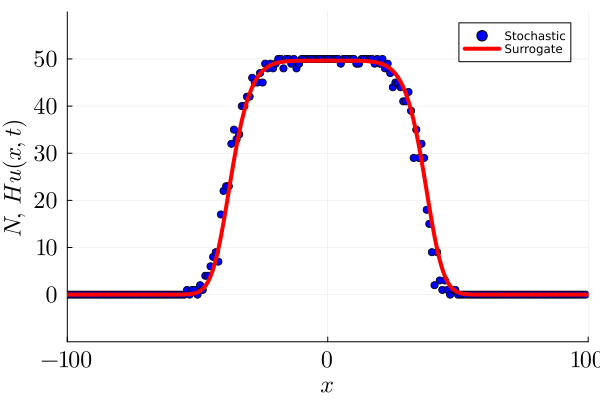

In [10]:
θG=[0.25,0.01]
lb=[0.1,0]
ub=[2.0,0.1]
@time (xopt,fopt)=Optimise(funmle,θG,lb,ub)
Dmle=xopt[1]
rmle=xopt[2]
fmle=fopt
numsol=pdesolver(LX,dx,N,T,h,U0,Dmle,rmle);
p1=scatter(xxloc,data,mc=:blue,msc=:match,label="Stochastic")
p1=plot!(-LX/2:dx:LX/2,LY*numsol[:,2],lc=:red,lw=4,label="Surrogate",xlabel=L"x",ylabel=L"N, \, H u(x,t)",xlims=(-100,100),ylims=(-10,60))
p1=plot!(xticks = ([-100,0,100],  [ L"-100", L"0", L"100" ]))
p1=plot!(yticks = ([0,10,20,30,40,50],[L"0", L"10", L"20", L"30", L"40", L"50"]))
p1=plot!(xguidefontsize=16, yguidefontsize=16,xtickfontsize=16,ytickfontsize=16)
display(p1) #Computes the MLE and plots data and MLE solution as a visual check

In [11]:
xopt #Print out the MLE

2-element Vector{Float64}:
 0.24225927573823586
 0.04934304833732716

In [12]:
df=1
llstar=-quantile(Chisq(df),0.95)/2;   #Compute the asymptotic threshold loglikelihood value

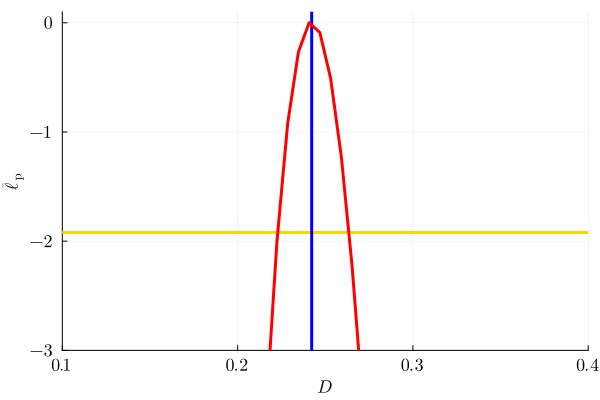

In [13]:
function univariateD(D) #Compute and plot univariate profile loglikelihood for D
    a=zeros(1)    
    function funD(a)
    return loglhood(data,[D,a[1]])
    end
    θG=[rmle]
    lb=[0] 
    ub=[1.] 
    (xopt,fopt)=Optimise(funD,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariateD(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
Drange=LinRange(0.10,0.40,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariateD(Drange[i])[1]
  #  println(i)
end

#q1=scatter(Drange,ff.-maximum(ff),ylims=(-3,0),legend=false,lw=3,color=:blue)
q1=hline([llstar],legend=false,lw=3,color=:gold)
q1=vline!([Dmle],legend=false,xlabel=L"D",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(Drange,ff.-maximum(ff),w=ones(length(Drange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,Drange)
q1=plot!(Drange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(Drange[1],Drange[end]))
q1=plot!(xticks=([0.1,0.2,0.3,0.4],[L"0.1", L"0.2", L"0.3",L"0.4"]))
q1=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q1)

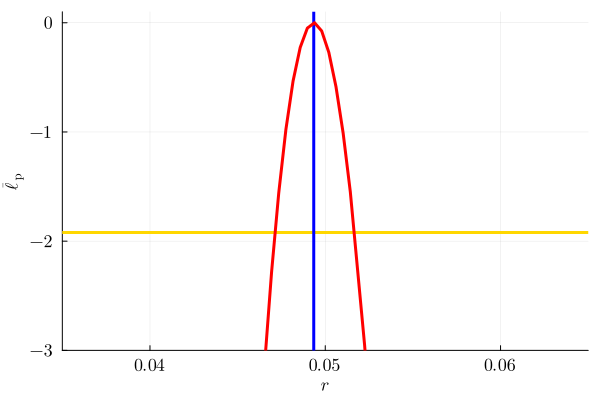

In [14]:
function univariater(r) #Compute and plot univariate profile loglikelihood for r
    a=zeros(1)    
    function funr(a)
    return loglhood(data,[a[1],r])
    end
    θG=[Dmle]
    lb=[0.1] 
    ub=[2.0] 
    (xopt,fopt)=Optimise(funr,θG,lb,ub)
    return fopt,xopt
    end 
    f(x) = univariater(x)[1]

#Take a grid of M points to plot the univariate profile likelihood
M=50;
rrange=LinRange(0.04,0.06,M)
ff=zeros(M)
for i in 1:M
    ff[i]=univariater(rrange[i])[1]
  #  println(i)
end


q2=hline([llstar],legend=false,lw=3,color=:gold)
q2=vline!([rmle],legend=false,xlabel=L"r",ylabel=L"\bar{\ell}_{\textrm{p}}",lw=3,color=:blue)
spl=Spline1D(rrange,ff.-maximum(ff),w=ones(length(rrange)),k=1,bc="nearest",s=1/100)
yy=evaluate(spl,rrange)
q2=plot!(rrange,yy,lw=3,lc=:red,ylims=(-3,0.1),xlims=(0.035,0.065))
q2=plot!(xticks=([0.04,0.05,0.06],[L"0.04",L"0.05", L"0.06"]))
q2=plot!(yticks=([0,-1,-2,-3],[L"0", L"-1", L"-2", L"-3"]))
q2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(q2)

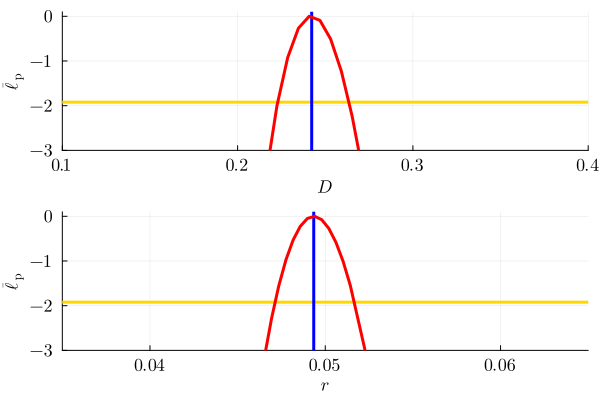

In [15]:
q3=plot(q1,q2,layout=(2,1))
#savefig(q3,"Profiles.pdf")
display(q3) #Figure 13(d)

In [16]:
fff(θ1,θ2) = funmle([θ1,θ2]) #Compute the observed Fisher Information at the MLE
H = -ForwardDiff.hessian(z -> fff(z[1],z[2]),xopt);
H = Symmetric(H) #Ensure the matrix is symmetric

2×2 Symmetric{Float64, Matrix{Float64}}:
 22880.0        1.57931e5
     1.57931e5  1.83918e6

In [17]:
Σ = inv(H)
Σ = Symmetric(Σ)

2×2 Symmetric{Float64, Matrix{Float64}}:
  0.000107314  -9.21504e-6
 -9.21504e-6    1.33502e-6

In [19]:
Σ = inv(H);
mvnorm = MvNormal(xopt, Σ); #MVN distribution to invoke Laplace's approximation
M=1000
samples = rand(mvnorm, M); #Draw parameter samples

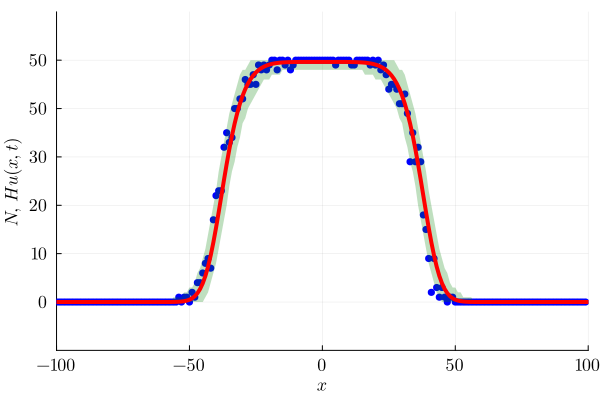

In [21]:
lower=zeros(length(xxloc));
upper=zeros(length(xxloc));

q25 = zeros((M,length(xxloc)));
q975 = zeros((M,length(xxloc)));

for i in 1:M
numsol=pdesolver(LX,dx,N,T,h,U0,samples[1,i],samples[2,i]);
u = linear_interpolation(-LX/2:dx:LX/2,numsol[:,2]);
    
    for j in 1:length(xxloc)
    q25[i,j] =  quantile(Binomial(LY,u(xxloc[j])),[.025,.975])[1] 
    q975[i,j] = quantile(Binomial(LY,u(xxloc[j])),[.025,.975])[2]
    end

end


for j in 1:length(xxloc)
    lower[j] = quantile(q25[:, j], 0.025);
    upper[j] = quantile(q975[:, j], 0.975);
end


numsol=pdesolver(LX,dx,N,T,h,U0,Dmle,rmle);
r2=scatter(xxloc,data,mc=:blue,msc=:auto,label=false)
r2=plot!(xxloc,lower,lw=0,fillrange=upper,fillalpha=0.25,color=:green,label=false,xlims=(-100,100),ylims=(-10,60))
r2=plot!(-LX/2:dx:LX/2,LY*numsol[:,2],lw=4,label=false,xlabel=L"x",ylabel=L"N, \, H u(x,t)",color=:red)
r2=plot!(xticks = ([-100,-50,0,50,100],  [L"-100", L"-50", L"0", L"50", L"100"]))
r2=plot!(yticks = ([0,10,20,30,40,50],[L"0", L"10", L"20", L"30", L"50", L"50"]))
r2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(r2) #Figure 13(d)

In [22]:
savefig(r2,"Predictions.pdf")

"C:\\Users\\simpsom3\\Dropbox\\RW_Inference_Identifiability_Prediction\\TidyCodes4GitHub\\Predictions.pdf"